TICA and clustering with CN- of 80:20 KA sims
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from collections import Counter
import mdtraj as md
#from CN_functions import *
#from gen_dtraj_functions import *

Some useful inhouse functions
------

In [4]:
#from plot_functions import *
import pickle

Read in the data
------

In [5]:
path='/data/isilon/rudzinski/cluster_tmp/ALA4/DPCA/'
# runs=10
# for run in range(runs):
#     run_file = path+str(run+1)+'/traj_intra.dat'
#     if (run==0):
#         dtraj = np.genfromtxt(run_file)[:,1:]
#     else:
#         dtraj = np.vstack((dtraj,np.genfromtxt(run_file)[:,1:]))
dtraj_OG = np.load(path+'dtraj_OG.npy')
# dtraj = np.genfromtxt('../../DPCA/dtraj_tica3D.dat')

In [6]:
dtraj = np.hstack((dtraj_OG,dtraj_OG[None,:,1].T))
dtraj[:,1] = np.sin(dtraj[:,1]*np.pi/180.)
dtraj[:,2] = np.cos(dtraj[:,2]*np.pi/180.)

In [7]:
state_pos = np.load('../../DPCA/state_pos_3state.npy')
state_map = np.load('../../DPCA/state_map_3state.npy')
state_map_r = np.load('../../DPCA/state_map_r_3state.npy')

In [8]:
mu = np.genfromtxt('../../DPCA/mu.dat')
sd = np.genfromtxt('../../DPCA/sd.dat')

In [9]:
# print state_pos
# print state_map_r
# print state_map
# sd

In [10]:
microstates = []
for fr in range(dtraj.shape[0]):
        pos = (dtraj[fr] - mu)/sd
        #pos = dtraj[fr]
        microstates.append( np.argmin( np.linalg.norm(pos - state_pos.T,axis=1) ) )

In [11]:
microstates = np.array(microstates)

In [12]:
# remove symmetrically identical states
from copy import deepcopy
microstates2 = deepcopy(microstates)
# microstates2[np.where(microstates2==2)[0]] = 1
# microstates2[np.where(microstates2==3)[0]] = 0
# microstates2[np.where(microstates2==5)[0]] = 2
# microstates2[np.where(microstates2==6)[0]] = 2

In [16]:
# microstates_ref = np.genfromtxt('../../DPCA/2states/mpp_traj_0.850_renum.dat').astype(int)
cut = 0.800
microstates_ref = np.genfromtxt('../../DPCA/microstates_renum2_3state.dat').astype(int)

In [17]:
plt.plot(microstates_ref)
plt.plot(microstates2)
plt.xlim([500,3000])

(500, 3000)

In [18]:
float(len(np.where(microstates2-microstates_ref==0)[0]))/len(microstates)

0.9777324453510929

In [19]:
N_feat = dtraj.shape[1]
print N_feat
N_clust = len(np.unique(microstates2))
print N_clust

3
3


In [20]:
np.unique(microstates2)

array([0, 1, 2])

In [21]:
feat_dist = [[] for state in range(N_clust)]
for state_ind,state in enumerate(np.unique(microstates2)):
    state_frs = np.where(microstates2==state)[0]
    for feat_ind in range(N_feat):
        feat_dist[state_ind].append(dtraj[state_frs,feat_ind])
feat_dist = np.array(feat_dist)

In [22]:
# define the color schemes for the mss_sets
from matplotlib.pyplot import *
mycmap = plt.cm.rainbow
mss_colors = []
mycmap_max = N_clust
mycmap_min = 0
# extract all colors from the map
mycmaplist = [mycmap(i) for i in range(mycmap.N)]
# create the new map
mycmap = mycmap.from_list('Custom cmap', mycmaplist, mycmap.N)
# define the bins and normalize
bounds = np.linspace(mycmap_min,mycmap_max,mycmap.N)
norm = matplotlib.colors.BoundaryNorm(bounds, mycmap.N)
mycmaplist = [mycmap(i) for i in range(mycmap.N)]
dx = bounds[1] - bounds[0]
mss_colors = []
for state in range(N_clust):
    grid = int( (state - mycmap_min)/dx + 0.5 )
    mss_colors.append(mycmaplist[grid])

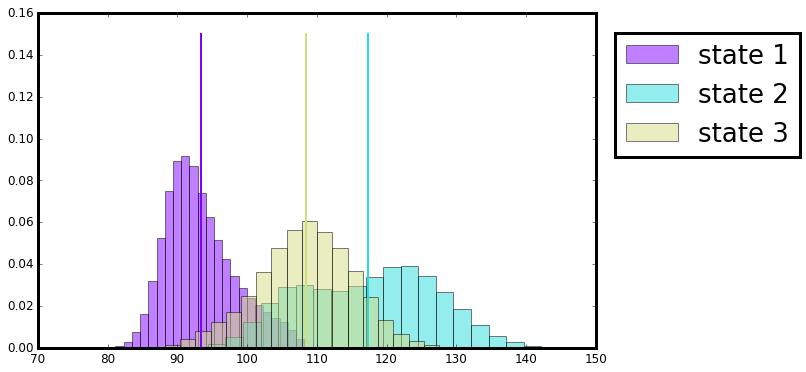

In [23]:
# everything by hand for Figs
feat_ind = 0
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,0.15,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

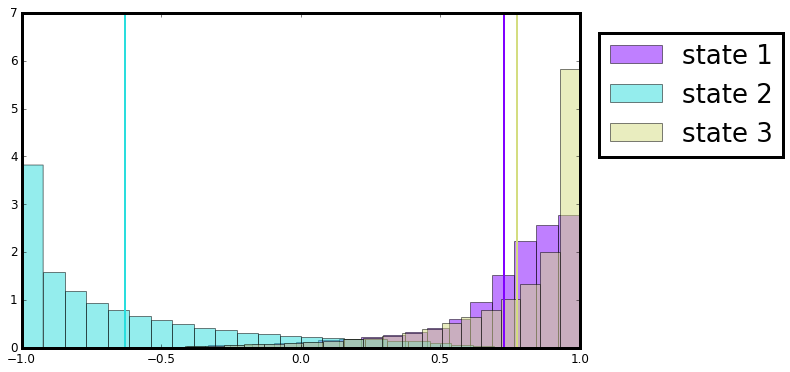

In [24]:
# everything by hand for Figs
feat_ind = 1
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,7.,10),color=mss_colors[state_ind],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

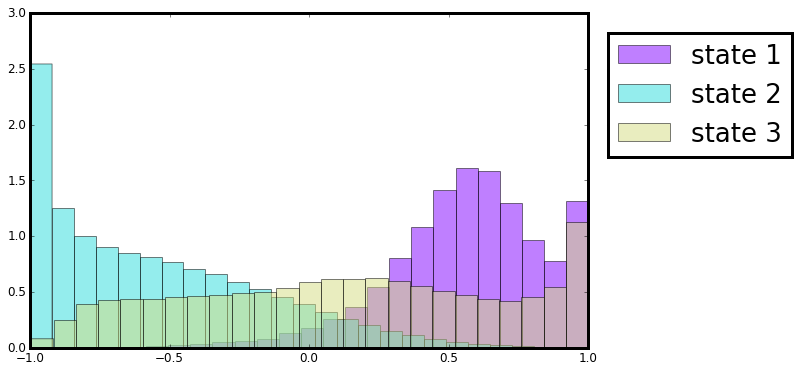

In [25]:
# everything by hand for Figs
feat_ind = 2
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for state_ind in range(N_clust):
    label = 'state '+str(state_ind+1)
    #state_frs = np.where(microstates2==state)[0]
    #tmp = plt.hist( dtraj[state_frs,feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )    
    tmp = plt.hist( feat_dist[state_ind][feat_ind], bins=25, normed=True, color=mss_colors[state_ind], alpha=0.5, label=label )
    #plt.plot(np.mean(feat_dist[state_ind][feat_ind])*np.ones(10),np.linspace(0,5.,10),color=mss_colors[state_map_r[state_ind]],linewidth=2)

ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='26',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

# plt.ylabel(r'${\rm P}({\rm WCN})$',fontsize='30',fontweight='normal')
# plt.xlabel(r'$E_{\rm LJ-SR:CN-H}$',fontsize='30',labelpad=10)

# plt.yticks(np.arange(10)*0.1,fontsize='20')
# plt.xticks(np.arange(8),fontsize='20')
# ax.tick_params(axis='both', which='major', pad=5)

# plt.ylim([0.,0.1])
# plt.xlim([-250,10])

# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.svg', format='svg', dpi=800)
# plt.savefig('fig_P-WCN-BB-'+str(feat)+'_'+str(N_mss[nstate])+'HstateHMM.eps', format='eps', dpi=800)
    
plt.show()

In [26]:
nstate=N_clust

In [27]:
state_frs = []
for state in range(nstate):
    state_frs.append(np.where(microstates_ref==state)[0])

In [28]:
for state in range(nstate):
    np.savetxt('state_frs_'+str(state)+'.dat',state_frs[state],fmt='%d')

In [29]:
for state in range(nstate):
    trj_tmp = np.zeros(len(microstates2))
    trj_tmp[state_frs[state]] = 1.
    trj_tmp = np.array([np.arange(len(trj_tmp)),trj_tmp]).T
    np.savetxt('drop_state'+str(state)+'.xvg',trj_tmp,fmt='%d')

In [30]:
np.unique(microstates2)

array([0, 1, 2])

In [31]:
microstates2[state_frs[0]]

array([0, 0, 0, ..., 0, 0, 0])